In [1]:
from datetime import datetime
# importing moules
import os
import pandas as pd
import matplotlib
import numpy as np
from re import search
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sns
import math
from seaborn import histplot

control_patients = pd.read_csv('/Users/valena17/psych_nlp/data/all_sample_controls.csv')
control_patients["PrimaryMrn"]=control_patients["PrimaryMrn"].values.astype(str)
scz_patients_comorbidities = pd.read_csv('/Users/valena17/psych_nlp/data/clean_ccsr_scz_patients.csv')
scz_patients_comorbidities["PrimaryMrn"]=scz_patients_comorbidities["PrimaryMrn"].values.astype(str)
scz_patients_demographics = pd.read_csv('/Users/valena17/psych_nlp/data/clean_ccsr_ONLYscz_patients.csv')
scz_patients_demographics["PrimaryMrn"]=scz_patients_demographics["PrimaryMrn"].values.astype(str)

/var/folders/xm/m4dy5bvs1fn7fb9wxjhsg4dc0000gn/T/ipykernel_78525/823044512.py:14: DtypeWarning: Columns (0,5) have mixed types. Specify dtype option on import or set low_memory=False.
  control_patients = pd.read_csv('/Users/valena17/psych_nlp/data/all_sample_controls.csv')
/var/folders/xm/m4dy5bvs1fn7fb9wxjhsg4dc0000gn/T/ipykernel_78525/823044512.py:16: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  scz_patients_comorbidities = pd.read_csv('/Users/valena17/psych_nlp/data/clean_ccsr_scz_patients.csv')


In [2]:
# weird = ['F06.0', 'F06.1', 'F06.2']
# testing = scz_patients_demographics[scz_patients_demographics.Value.isin(list(weird))]
# pd.DataFrame.to_csv(testing, "/Users/valena17/psych_nlp/data/explore_F6.csv",index = False)

In [94]:
# control_patients = control_patients[~control_patients.PrimaryMrn.isin(list(set(scz_patients_demographics.PrimaryMrn)))]

In [95]:
# control_patients = control_patients[control_patients["PrimaryMrn"].str.contains("<TMP") == False]

In [96]:
# pd.DataFrame.to_csv(control_patients, "/Users/valena17/psych_nlp/data/all_sample_controls.csv",index = False)

In [2]:
df_comorbidity = pd.concat([scz_patients_comorbidities,control_patients])
df_comorbidity

,PrimaryMrn,EncounterKey,VisitDate,AgeAtVisit,VisitType,VisitType2,Value,DisplayString,PayorFinancialClass,ProviderSex,...,PreferredLanguage,SexualOrientation,Merged_Gender,Race_2,Age_group,insurance_status,CCSR_wSubstance,PostalCode,2021_Median_Hincome,ZIPINC_QRTL
0,1003157,10026992,2009-02-02 00:00:00,49.0,Office Visit,Outpatient,F32.A,"Depression, unspecified",Self-Pay,Male,...,English,Straight,Male,Other Race,45-54,Self-pay,Depressive disorders,NaN,NaN,NaN
1,1003157,10194062,2011-07-20 18:54:00,52.0,Hospital Encounter,Inpatient,F39,Unspecified mood (affective) disorder,Self-Pay,Male,...,English,Straight,Male,Other Race,45-54,Self-pay,Other specified and unspecified mood disorders,NaN,NaN,NaN
2,1003157,12589140,2011-11-30 00:00:00,52.0,Psych Conf Office Visit,Recurring,F19.10,"Other psychoactive substance abuse, uncomplicated",Self-Pay,Female,...,English,Straight,Male,Other Race,45-54,Self-pay,Substance-related disorders,NaN,NaN,NaN
3,1003157,251130954,2012-02-22 00:00:00,52.0,Office Visit,Outpatient,F25.9,"Schizoaffective disorder, unspecified",NaN,NaN,...,English,Straight,Male,Other Race,45-54,NaN,Schizophrenia spectrum and other psychotic dis...,NaN,NaN,NaN
4,1003157,109266117,2018-02-13 00:00:00,58.0,Office Visit,Outpatient,F17.210,"Nicotine dependence, cigarettes, uncomplicated",NaN,Male,...,English,Straight,Male,Other Race,55-64,NaN,Substance-related disorders,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466229,X400206,313708011,2022-11-06,122.0,Hospital Encounter,Emergency,F10.920,"Alcohol use, unspecified with intoxication, un...",NaN,NaN,...,English,NaN,Male,White,NaN,Self-pay,Substance-related disorders,10019,105538.0,"88,000+"
466230,X400207,313707727,2022-11-06,36.0,Hospital Encounter,Emergency,F10.920,"Alcohol use, unspecified with intoxication, un...",NaN,NaN,...,English,NaN,Male,Other Race,NaN,Self-pay,Substance-related disorders,11420,89027.0,"88,000+"
466231,X400208,313709156,2022-11-06,25.0,Hospital Encounter,Emergency,F10.929,"Alcohol use, unspecified with intoxication, un...",NaN,NaN,...,English,NaN,Male,Black or African-American,NaN,Self-pay,Substance-related disorders,08042,NaN,NaN
466232,X400209,313707490,2022-11-06,25.0,Hospital Encounter,Emergency,F10.920,"Alcohol use, unspecified with intoxication, un...",NaN,NaN,...,English,NaN,Male,Other Race,NaN,Self-pay,Substance-related disorders,10019,105538.0,"88,000+"


In [3]:
print(df_comorbidity.PrimaryMrn.nunique())
df_comorbidity = df_comorbidity[df_comorbidity['CCSR_wSubstance'].isin(['Schizophrenia spectrum and other psychotic disorders',
                                    'Substance-related disorders',
                                    'Depressive disorders',
                                    'Bipolar and related disorders',
                                    'Trauma- and stressor-related disorders',
                                    'Anxiety and fear-related disorders'])]
print(df_comorbidity.PrimaryMrn.nunique())

343480
280716


In [4]:
co_mat = pd.crosstab(df_comorbidity.PrimaryMrn, df_comorbidity.CCSR_wSubstance)
co_mat

CCSR_wSubstance,Anxiety and fear-related disorders,Bipolar and related disorders,Depressive disorders,Schizophrenia spectrum and other psychotic disorders,Substance-related disorders,Trauma- and stressor-related disorders
PrimaryMrn,,,,,,
1000094,0,0,0,0,0,1
1000224,1,0,0,0,1,0
1000417,1,0,1,0,0,0
1000446,0,0,1,0,0,0
1000539,0,0,0,0,1,0
...,...,...,...,...,...,...
X400206,0,0,0,0,1,0
X400207,0,0,0,0,1,0
X400208,0,0,0,0,1,0


In [5]:
control_patients_demographics = control_patients.drop_duplicates('PrimaryMrn')
print(control_patients_demographics.PrimaryMrn.nunique())
control_patients_demographics

323606


,PrimaryMrn,AgeInYears,BirthDate,PreferredLanguage,SexualOrientation,PostalCode,EncounterKey,AgeAtVisit,VisitDate,VisitType,VisitType2,Value,DisplayString,CCSR_code,CCSR_wSubstance,Merged_Gender,Race_2,insurance_status,2021_Median_Hincome,ZIPINC_QRTL
0,1000094,48.0,1974-12-10,English,NaN,10029.0,323315612,47.0,2022-11-12,Hospital Encounter,Emergency,F43.24,Adjustment disorder with disturbance of conduct,Trauma- and stressor-related disorders,Trauma- and stressor-related disorders,Male,Other Race,Private,33901.0,"<52,000"
1,1000224,75.0,1947-09-29,English,Straight,10701.0,3561374,62.0,2010-06-24,Psych Conf Office Visit,Outpatient,F41.1,Generalized anxiety disorder,Anxiety and fear-related disorders,Anxiety and fear-related disorders,Male,Black or African-American,Self-pay,55553.0,"52,000 - 65,999"
3,1000417,54.0,1968-05-25,English,Straight,10039.0,3068279,41.0,2010-02-03,Psych Conf Telephone,NaN,F33.1,"Major depressive disorder, recurrent, moderate",Depressive disorders,Depressive disorders,Female,Black or African-American,Self-pay,50164.0,"<52,000"
5,1000445,48.0,1974-05-01,English,NaN,10025.0,56386678,42.0,2017-03-23,Admission Eval,Outpatient,F39,Unspecified mood (affective) disorder,Other specified and unspecified mood disorders,Other specified and unspecified mood disorders,Female,Other Race,Self-pay,103440.0,"88,000+"
6,1000446,48.0,1974-08-23,English,NaN,10029.0,53840418,42.0,2017-01-25,Office Visit,Outpatient,F32.A,"Depression, unspecified",Depressive disorders,Depressive disorders,Female,Other Race,Public,33901.0,"<52,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466229,X400206,122.0,1900-11-06,English,NaN,10019,313708011,122.0,2022-11-06,Hospital Encounter,Emergency,F10.920,"Alcohol use, unspecified with intoxication, un...",Alcohol-related disorders,Substance-related disorders,Male,White,Self-pay,105538.0,"88,000+"
466230,X400207,36.0,1986-07-26,English,NaN,11420,313707727,36.0,2022-11-06,Hospital Encounter,Emergency,F10.920,"Alcohol use, unspecified with intoxication, un...",Alcohol-related disorders,Substance-related disorders,Male,Other Race,Self-pay,89027.0,"88,000+"
466231,X400208,26.0,1996-12-13,English,NaN,08042,313709156,25.0,2022-11-06,Hospital Encounter,Emergency,F10.929,"Alcohol use, unspecified with intoxication, un...",Alcohol-related disorders,Substance-related disorders,Male,Black or African-American,Self-pay,NaN,NaN
466232,X400209,26.0,1996-11-24,English,NaN,10019,313707490,25.0,2022-11-06,Hospital Encounter,Emergency,F10.920,"Alcohol use, unspecified with intoxication, un...",Alcohol-related disorders,Substance-related disorders,Male,Other Race,Self-pay,105538.0,"88,000+"


In [6]:
df_demographics = pd.concat([scz_patients_demographics,control_patients_demographics])
print(df_demographics.PrimaryMrn.nunique())

343480


In [7]:
df_demographics[df_demographics['PostalCode'].isna()]

,PrimaryMrn,EncounterKey,VisitDate,AgeAtVisit,VisitType,VisitType2,Value,DisplayString,PayorFinancialClass,ProviderSex,...,PreferredLanguage,SexualOrientation,Merged_Gender,Race_2,Age_group,insurance_status,PostalCode,2021_Median_Hincome,ZIPINC_QRTL,CCSR_wSubstance
71,1051922,236450064,2016-07-11 00:00:00,61.0,Office Visit,Outpatient,F20.9,"Schizophrenia, unspecified",NaN,NaN,...,English,NaN,Male,White,55-64,NaN,NaN,NaN,NaN,Schizophrenia spectrum and other psychotic dis...
202,1133076,257788075,2012-03-02 00:00:00,58.0,Office Visit,Outpatient,F25.9,"Schizoaffective disorder, unspecified",NaN,NaN,...,Spanish,NaN,Female,Other Race,55-64,NaN,NaN,NaN,NaN,Schizophrenia spectrum and other psychotic dis...
355,1237363,290340833,2022-02-10 12:45:00,61.0,Hospital Encounter,Emergency,F20.3,Undifferentiated schizophrenia,Self-Pay,Male,...,English,NaN,Male,Other Race,55-64,Self-pay,NaN,NaN,NaN,Schizophrenia spectrum and other psychotic dis...
369,1247962,315002064,2022-03-28 00:00:00,54.0,Hospital Encounter,Emergency,F20.0,Paranoid schizophrenia,Medicare Managed Care,NaN,...,English,NaN,Male,White,45-54,Public,NaN,NaN,NaN,Schizophrenia spectrum and other psychotic dis...
463,1303549,281720001,2018-09-06 00:00:00,59.0,Office Visit,Outpatient,F22,Delusional disorders,NaN,NaN,...,NaN,NaN,Female,Other Race,55-64,NaN,NaN,NaN,NaN,Schizophrenia spectrum and other psychotic dis...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466024,K159599,312490687,2022-10-25,12.0,Psych Conf Refill,NaN,F84.0,Autistic disorder,NaN,NaN,...,English,NaN,Male,Other Race,NaN,Self-pay,NaN,NaN,NaN,Neurodevelopmental disorders
466184,X300043,253965352,2019-06-22,12.0,Office Visit,Outpatient,F91.3,Oppositional defiant disorder,NaN,NaN,...,English,NaN,Female,Black or African-American,NaN,NaN,NaN,NaN,NaN,"Disruptive, impulse-control and conduct disorders"
466188,X300058,181415492,2020-05-17,46.0,Hospital Encounter,Emergency,F10.920,"Alcohol use, unspecified with intoxication, un...",NaN,NaN,...,Spanish,NaN,Male,Other Race,NaN,Public,NaN,NaN,NaN,Substance-related disorders
466202,X400059,89282881,2019-01-13,27.0,Hospital Encounter,Emergency,F10.920,"Alcohol use, unspecified with intoxication, un...",NaN,NaN,...,English,NaN,Male,White,NaN,Self-pay,NaN,NaN,NaN,Substance-related disorders


In [104]:
# pd.DataFrame.to_csv(df_demographics[df_demographics['PostalCode'].isna()], "/Users/valena17/psych_nlp/data/scz_con_patients_noZIPCODE.csv",index = False)
# df_comorbidity[df_comorbidity.PrimaryMrn.isin(homeless_mrns)]['PrimaryMrn'].nunique()
# homeless_mrns
# df_comorbidity[df_comorbidity.PrimaryMrn.isin(homeless_mrns)]['ZIPINC_QRTL']# = 'NO_ZIP'
# df_comorbidity.ZIPINC_QRTL.value_counts()
no_zip_pts = pd.read_csv('/Users/valena17/DataGripProjects/msdw2/output/scz_con_patients_noZIPCODE_notes.csv')
no_zip_pts["PrimaryMrn"] = no_zip_pts["PrimaryMrn"].values.astype(str)
homeless_mrns = no_zip_pts.groupby(['PrimaryMrn'])['Text'].apply(lambda x: x[x.str.contains('|'.join(['homeless', 'shelter', 'nursing home']))].count())
homeless_mrns = homeless_mrns.to_frame()
homeless_mrns = homeless_mrns[homeless_mrns.Text != 0]
homeless_mrns = list(homeless_mrns.index)
homeless_mrns

['1099695',
 '1129510',
 '1153185',
 '1285946',
 '1337396',
 '1337968',
 '1347435',
 '1437203',
 '1457312',
 '1464893',
 '1480796',
 '1493130',
 '1511825',
 '1515670',
 '1653759',
 '1659692',
 '1950323',
 '2503596',
 '2758123',
 '3017760',
 '3196395',
 '3224999',
 '3526938',
 '3595188',
 '3841869',
 '3845524',
 '3845893',
 '4038045',
 '4546865',
 '4848148',
 '4905686',
 '5717988',
 '6402314',
 '6630593',
 '6643413',
 '6909333',
 '6946421',
 '6993375',
 '7045244',
 '7108297',
 '7156096',
 '7239301',
 '727247',
 '7313843',
 '734042',
 '748485',
 '7590623',
 '7691724',
 '7930554',
 '8063441',
 '8072301',
 '8100162',
 '8154635',
 '8182328',
 '8206637',
 '8225148',
 '8227721',
 '8231926',
 '8236406',
 '831806',
 '8329667',
 '8342784',
 '8463334',
 '8564761',
 '8599223',
 '8645656',
 '8755450',
 '9002508',
 '9021832',
 '9034167',
 '9037431',
 '9040831',
 '9061113',
 '9080549',
 '952215',
 'A240738',
 'A341156',
 'A407168',
 'E104831',
 'E105683',
 'E106920',
 'E107352',
 'E107861',
 'E107874

In [105]:
def homeless(x):
    if x.PrimaryMrn in homeless_mrns:
        return 1
    else:
        return 0

df_demographics['homeless'] = df_demographics.apply(lambda row: homeless(row), axis=1)
df_demographics.homeless.value_counts(dropna=False)

0    342980
1       500
Name: homeless, dtype: int64

In [106]:
# df_demographics['income_range'] = df_demographics['ZIPINC_QRTL']
# df_demographics['income_range_2'] = df_demographics['ZIPINC_QRTL']

def homeless(x):
    if x.PrimaryMrn in homeless_mrns:
        return 0
    else:
        return x['2021_Median_Hincome']

df_demographics['2021_Median_Hincome'] = df_demographics.apply(lambda row: homeless(row), axis=1)
df_demographics['2021_Median_Hincome'].value_counts(dropna=False)

33901.0     23074
NaN         20270
103440.0    16907
105538.0     9803
32555.0      7756
            ...  
77829.0         1
65935.0         1
85652.0         1
90435.0         1
56307.0         1
Name: 2021_Median_Hincome, Length: 1502, dtype: int64

In [12]:
# df_demographics['income_range'] = df_demographics['ZIPINC_QRTL']
#
# def homeless(x):
#     if x.PrimaryMrn in homeless_mrns:
#         return 'NO_ZIP'
#     else:
#         return x.ZIPINC_QRTL
#
# df_demographics['income_range'] = df_demographics.apply(lambda row: homeless(row), axis=1)
# df_demographics.income_range.value_counts(dropna=False)

88,000+            122241
<52,000             63114
66,000 - 87,999     40721
52,000 - 65,999     38493
NaN                 15507
NO_ZIP                500
Name: income_range, dtype: int64

In [107]:
df_demographics

,PrimaryMrn,EncounterKey,VisitDate,AgeAtVisit,VisitType,VisitType2,Value,DisplayString,PayorFinancialClass,ProviderSex,...,SexualOrientation,Merged_Gender,Race_2,Age_group,insurance_status,PostalCode,2021_Median_Hincome,ZIPINC_QRTL,CCSR_wSubstance,homeless
0,1003157,251130954,2012-02-22 00:00:00,52.0,Office Visit,Outpatient,F25.9,"Schizoaffective disorder, unspecified",NaN,NaN,...,Straight,Male,Other Race,45-54,NaN,10029.0,33901.0,"<52,000",Schizophrenia spectrum and other psychotic dis...,0
1,1003377,169200845,2019-11-15 00:00:00,55.0,Office Visit,Outpatient,F20.9,"Schizophrenia, unspecified",NaN,NaN,...,NaN,Female,Black or African-American,55-64,NaN,11221.0,66923.0,"66,000 - 87,999",Schizophrenia spectrum and other psychotic dis...,0
2,1003711,256957683,2014-11-14 00:00:00,41.0,Office Visit,Outpatient,F29,Unspecified psychosis not due to a substance o...,NaN,NaN,...,NaN,Female,Black or African-American,35-44,NaN,10451.0,33945.0,"<52,000",Schizophrenia spectrum and other psychotic dis...,0
3,1007012,318511167,2018-06-20 00:00:00,43.0,Hospital Encounter,Emergency,F29,Unspecified psychosis not due to a substance o...,Medicaid Managed Care,NaN,...,Straight,Female,Hispanic or Latino,35-44,Public,10128.0,127919.0,"88,000+",Schizophrenia spectrum and other psychotic dis...,0
4,1007542,263308933,2021-02-14 00:00:00,33.0,Office Visit,Outpatient,F20.9,"Schizophrenia, unspecified",NaN,NaN,...,NaN,Male,Other Race,25-34,NaN,10009.0,77551.0,"66,000 - 87,999",Schizophrenia spectrum and other psychotic dis...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475697,X400206,313708011,2022-11-06,122.0,Hospital Encounter,Emergency,F10.920,"Alcohol use, unspecified with intoxication, un...",NaN,NaN,...,NaN,Male,White,NaN,Self-pay,10019,105538.0,"88,000+",Substance-related disorders,0
475698,X400207,313707727,2022-11-06,36.0,Hospital Encounter,Emergency,F10.920,"Alcohol use, unspecified with intoxication, un...",NaN,NaN,...,NaN,Male,Other Race,NaN,Self-pay,11420,89027.0,"88,000+",Substance-related disorders,0
475699,X400208,313709156,2022-11-06,25.0,Hospital Encounter,Emergency,F10.929,"Alcohol use, unspecified with intoxication, un...",NaN,NaN,...,NaN,Male,Black or African-American,NaN,Self-pay,08042,NaN,NaN,Substance-related disorders,0
475700,X400209,313707490,2022-11-06,25.0,Hospital Encounter,Emergency,F10.920,"Alcohol use, unspecified with intoxication, un...",NaN,NaN,...,NaN,Male,Other Race,NaN,Self-pay,10019,105538.0,"88,000+",Substance-related disorders,0


In [9]:
df_demographics = df_demographics[['PrimaryMrn', 'Merged_Gender', 'Race_2', 'SexualOrientation', 'AgeInYears', 'AgeAtVisit',
                                   'insurance_status', '2021_Median_Hincome']]
df_demographics.head(50)

,PrimaryMrn,Merged_Gender,Race_2,SexualOrientation,AgeInYears,AgeAtVisit,insurance_status,2021_Median_Hincome
0,1003157,Male,Other Race,Straight,63.0,52.0,NaN,33901.0
1,1003377,Female,Black or African-American,NaN,58.0,55.0,NaN,66923.0
2,1003711,Female,Black or African-American,NaN,49.0,41.0,NaN,33945.0
3,1007012,Female,Hispanic or Latino,Straight,48.0,43.0,Public,127919.0
4,1007542,Male,Other Race,NaN,35.0,33.0,NaN,77551.0
5,1008703,Male,Other Race,NaN,33.0,33.0,Public,63851.0
6,1008965,Male,Other Race,NaN,87.0,80.0,Self-pay,103440.0
7,1009219,Female,Black or African-American,NaN,47.0,41.0,NaN,33901.0
8,1010078,Male,Black or African-American,NaN,47.0,41.0,NaN,65038.0
9,101057,Male,Other Race,NaN,73.0,66.0,NaN,57180.0


In [10]:
propensity_df = df_demographics.merge(co_mat, on=['PrimaryMrn'], how='left')
propensity_df

,PrimaryMrn,Merged_Gender,Race_2,SexualOrientation,AgeInYears,AgeAtVisit,insurance_status,2021_Median_Hincome,Anxiety and fear-related disorders,Bipolar and related disorders,Depressive disorders,Schizophrenia spectrum and other psychotic disorders,Substance-related disorders,Trauma- and stressor-related disorders
0,1003157,Male,Other Race,Straight,63.0,52.0,NaN,33901.0,0.0,0.0,1.0,1.0,2.0,0.0
1,1003377,Female,Black or African-American,NaN,58.0,55.0,NaN,66923.0,0.0,1.0,1.0,1.0,0.0,0.0
2,1003711,Female,Black or African-American,NaN,49.0,41.0,NaN,33945.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1007012,Female,Hispanic or Latino,Straight,48.0,43.0,Public,127919.0,1.0,1.0,1.0,1.0,0.0,1.0
4,1007542,Male,Other Race,NaN,35.0,33.0,NaN,77551.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343475,X400206,Male,White,NaN,122.0,122.0,Self-pay,105538.0,0.0,0.0,0.0,0.0,1.0,0.0
343476,X400207,Male,Other Race,NaN,36.0,36.0,Self-pay,89027.0,0.0,0.0,0.0,0.0,1.0,0.0
343477,X400208,Male,Black or African-American,NaN,26.0,25.0,Self-pay,NaN,0.0,0.0,0.0,0.0,1.0,0.0
343478,X400209,Male,Other Race,NaN,26.0,25.0,Self-pay,105538.0,0.0,0.0,0.0,0.0,1.0,0.0


In [110]:
propensity_df['Substance-related disorders'] = propensity_df['Substance-related disorders'].clip(0, 1)

In [111]:
propensity_df_blackwhite = propensity_df[propensity_df['Race_2'].isin(['Black or African-American', 'White'])]
propensity_df_blackwhite_malefemale = propensity_df_blackwhite[propensity_df_blackwhite['Merged_Gender'].isin(['Female', 'Male'])]

In [112]:
propensity_df_blackwhite_malefemale

,PrimaryMrn,Merged_Gender,Race_2,AgeInYears,AgeAtVisit,insurance_status,2021_Median_Hincome,homeless,Anxiety and fear-related disorders,Bipolar and related disorders,Depressive disorders,Schizophrenia spectrum and other psychotic disorders,Substance-related disorders,Trauma- and stressor-related disorders
1,1003377,Female,Black or African-American,58.0,55.0,NaN,66923.0,0,0.0,1.0,1.0,1.0,0.0,0.0
2,1003711,Female,Black or African-American,49.0,41.0,NaN,33945.0,0,0.0,1.0,0.0,1.0,0.0,0.0
7,1009219,Female,Black or African-American,47.0,41.0,NaN,33901.0,0,0.0,1.0,1.0,1.0,0.0,0.0
8,1010078,Male,Black or African-American,47.0,41.0,NaN,65038.0,0,0.0,0.0,0.0,1.0,0.0,1.0
10,1010656,Female,Black or African-American,73.0,69.0,NaN,152335.0,0,1.0,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343471,X400199,Male,Black or African-American,122.0,122.0,Self-pay,105538.0,0,0.0,0.0,0.0,0.0,1.0,0.0
343472,X400200,Male,Black or African-American,20.0,20.0,Self-pay,105538.0,0,0.0,0.0,0.0,0.0,1.0,0.0
343474,X400205,Female,Black or African-American,20.0,20.0,Self-pay,105538.0,0,0.0,0.0,0.0,0.0,1.0,0.0
343475,X400206,Male,White,122.0,122.0,Self-pay,105538.0,0,0.0,0.0,0.0,0.0,1.0,0.0


In [55]:
# propensity_df_blackwhite_malefemale['AgeAtVisit'] = propensity_df_blackwhite_malefemale['AgeAtVisit'].clip(0, 99)
# propensity_df_blackwhite_malefemale['AgeInYears'] = propensity_df_blackwhite_malefemale['AgeInYears'].clip(0, 99)

/var/folders/xm/m4dy5bvs1fn7fb9wxjhsg4dc0000gn/T/ipykernel_4046/3589547643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  propensity_df_blackwhite_malefemale['AgeAtVisit'] = propensity_df_blackwhite_malefemale['AgeAtVisit'].clip(0, 99)
/var/folders/xm/m4dy5bvs1fn7fb9wxjhsg4dc0000gn/T/ipykernel_4046/3589547643.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  propensity_df_blackwhite_malefemale['AgeInYears'] = propensity_df_blackwhite_malefemale['AgeInYears'].clip(0, 99)


<AxesSubplot:xlabel='AgeAtVisit', ylabel='Count'>

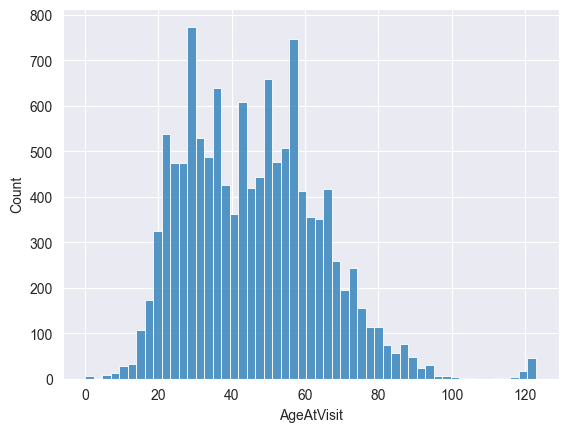

In [113]:
histplot(data=propensity_df_blackwhite_malefemale[propensity_df_blackwhite_malefemale['Schizophrenia spectrum and other psychotic disorders'] == 1], x="AgeAtVisit")

<AxesSubplot:xlabel='AgeInYears', ylabel='Count'>

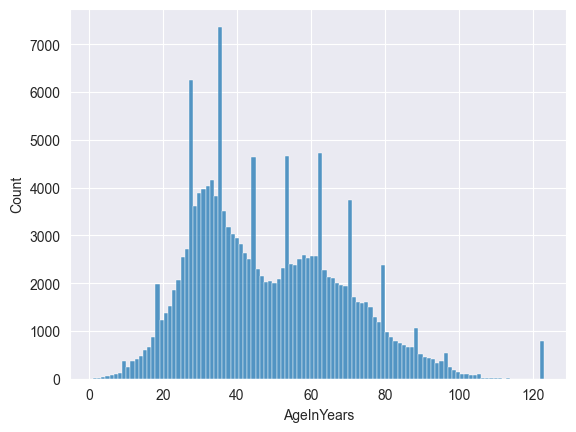

In [114]:
histplot(data=propensity_df_blackwhite_malefemale[propensity_df_blackwhite_malefemale['Schizophrenia spectrum and other psychotic disorders'] == 0], x="AgeInYears")

/var/folders/xm/m4dy5bvs1fn7fb9wxjhsg4dc0000gn/T/ipykernel_4046/4089134106.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  propensity_df_blackwhite_malefemale['Age'] = propensity_df_blackwhite_malefemale.apply(lambda row: age(row), axis=1)


<AxesSubplot:xlabel='Age', ylabel='Count'>

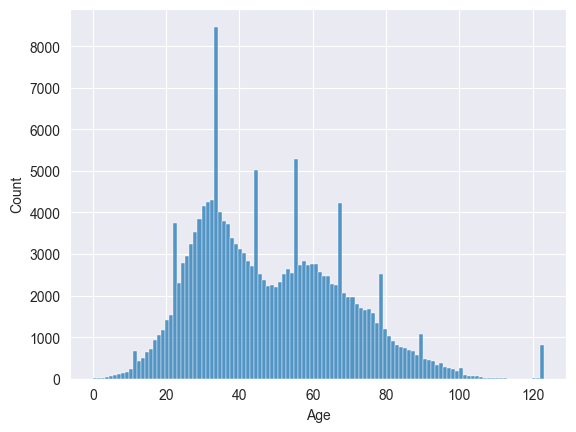

In [115]:
def age(x):
    age1 = x.AgeInYears
    age2 = x.AgeAtVisit
    if x['Schizophrenia spectrum and other psychotic disorders'] == 1:
        return age2
    if x['Schizophrenia spectrum and other psychotic disorders'] == 0:
        return age1


propensity_df_blackwhite_malefemale['Age'] = propensity_df_blackwhite_malefemale.apply(lambda row: age(row), axis=1)

histplot(data=propensity_df_blackwhite_malefemale, x="Age")

<AxesSubplot:xlabel='Age', ylabel='Count'>

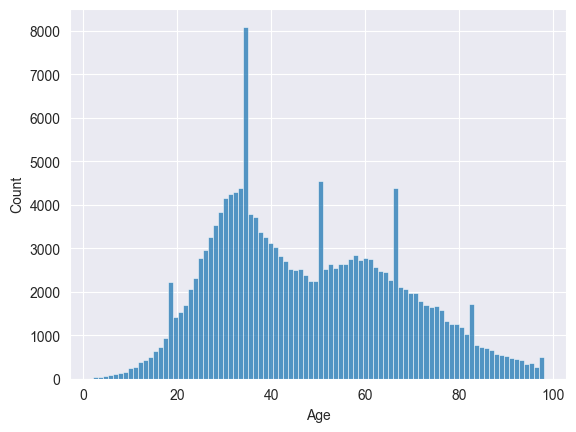

In [116]:
propensity_df_blackwhite_malefemale = propensity_df_blackwhite_malefemale[propensity_df_blackwhite_malefemale['Age'] > 1]
propensity_df_blackwhite_malefemale = propensity_df_blackwhite_malefemale[propensity_df_blackwhite_malefemale['Age'] < 99]
histplot(data=propensity_df_blackwhite_malefemale, x="Age")

In [117]:
propensity_df_blackwhite_malefemale = propensity_df_blackwhite_malefemale.rename(columns={'Merged_Gender' : 'Gender',
                                                                                          'Race_2' : 'Race_Ethnicity',
                                                                                          'Anxiety and fear-related disorders' : 'Anx',
                                                                                          'Bipolar and related disorders' : 'Bpd',
                                                                                          'Depressive disorders' : 'Dep',
                                                                                          'Schizophrenia spectrum and other psychotic disorders' : 'Scz',
                                                                                          'Substance-related disorders' : 'Substance',
                                                                                          'Trauma- and stressor-related disorders' : 'Trauma_stress',
                                                                                          '2021_Median_Hincome' : 'm_income'})

In [119]:
# propensity_df_blackwhite_malefemale['Zipcode_Qrtl'] = propensity_df_blackwhite_malefemale['Zipcode_Qrtl'].fillna('None_reported')
# propensity_df_blackwhite_malefemale['insurance_status'] = propensity_df_blackwhite_malefemale['insurance_status'].fillna('None_reported')
propensity_df_blackwhite_malefemale = propensity_df_blackwhite_malefemale.dropna(subset = ['m_income'])
propensity_df_blackwhite_malefemale

,PrimaryMrn,Gender,Race_Ethnicity,AgeInYears,AgeAtVisit,insurance_status,m_income,homeless,Anx,Bpd,Dep,Scz,Substance,Trauma_stress,Age
1,1003377,Female,Black or African-American,58.0,55.0,NaN,66923.0,0,0.0,1.0,1.0,1.0,0.0,0.0,55.0
2,1003711,Female,Black or African-American,49.0,41.0,NaN,33945.0,0,0.0,1.0,0.0,1.0,0.0,0.0,41.0
7,1009219,Female,Black or African-American,47.0,41.0,NaN,33901.0,0,0.0,1.0,1.0,1.0,0.0,0.0,41.0
8,1010078,Male,Black or African-American,47.0,41.0,NaN,65038.0,0,0.0,0.0,0.0,1.0,0.0,1.0,41.0
10,1010656,Female,Black or African-American,73.0,69.0,NaN,152335.0,0,1.0,0.0,1.0,1.0,1.0,0.0,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343453,X400074,Male,White,31.0,27.0,Self-pay,105538.0,0,0.0,0.0,0.0,0.0,1.0,0.0,31.0
343457,X400091,Male,White,29.0,26.0,Self-pay,127919.0,0,0.0,0.0,0.0,0.0,1.0,0.0,29.0
343460,X400119,Female,White,38.0,35.0,Public,77551.0,0,0.0,0.0,0.0,0.0,1.0,0.0,38.0
343472,X400200,Male,Black or African-American,20.0,20.0,Self-pay,105538.0,0,0.0,0.0,0.0,0.0,1.0,0.0,20.0


In [120]:
propensity_df_blackwhite_malefemale['m_income'] = propensity_df_blackwhite_malefemale['m_income'].replace(0, 'NA')

/var/folders/xm/m4dy5bvs1fn7fb9wxjhsg4dc0000gn/T/ipykernel_4046/2478725878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  propensity_df_blackwhite_malefemale['m_income'] = propensity_df_blackwhite_malefemale['m_income'].replace(0, 'NA')


In [121]:
print(propensity_df_blackwhite_malefemale['m_income'].value_counts(dropna=False),
    propensity_df_blackwhite_malefemale['homeless'].value_counts(dropna=False))

103440.0    8250
33901.0     7956
105538.0    4921
58435.0     3907
153177.0    3560
            ... 
115990.0       1
108769.0       1
84779.0        1
156477.0       1
108705.0       1
Name: m_income, Length: 1241, dtype: int64 0    163898
1       251
Name: homeless, dtype: int64


In [122]:
propensity_df_blackwhite_malefemale = propensity_df_blackwhite_malefemale.drop(['AgeAtVisit', 'AgeInYears'], axis=1)

In [123]:
pd.DataFrame.to_csv(propensity_df_blackwhite_malefemale, "/Users/valena17/psych_nlp/data/blackwhite_malefemale_sczANDcontrols.csv",index = False)